<a href="https://colab.research.google.com/github/Git-Hub-Pro/clothes_recognition_unet/blob/master/clothes_recognition_UNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
# os는 파일에 접근하게 해주는 라이브러리이다.
import os
import sys
import random
import warnings

# 데이터 처리를 하는데 사용되는 라이브러리
import numpy as np
import pandas as pd

# plot chart 를 만들어주는 라이브러리.
import matplotlib.pyplot as plt
from tqdm import tqdm # 상태바 기능을 제공, 완료 진행과정을 보여줍니다. 

# openCV 사용
import cv2 

# colab을 사용하고 있어서 아래와 같은 경로를 사용하였습니다.../content/gdrive/My Drive/까지는 기본적으로 클라우드 실행시 경로입니다. 
# 가공되기전 이미지들이 저장된 디렉토리 주소
IMG_PATH = '../content/gdrive/My Drive/data/clothes_recognition/add_clothes_image'
IMG_PATH_RED = '../content/gdrive/My Drive/data/clothes_recognition/add_clothes_image/red'
IMG_PATH_ORANGE = '../content/gdrive/My Drive/data/clothes_recognition/add_clothes_image/orange'
IMG_PATH_YELLOW = '../content/gdrive/My Drive/data/clothes_recognition/add_clothes_image/yellow'
IMG_PATH_GREEN = '../content/gdrive/My Drive/data/clothes_recognition/add_clothes_image/green'
IMG_PATH_BLUE = '../content/gdrive/My Drive/data/clothes_recognition/add_clothes_image/blue'
IMG_PATH_PURPLE = '../content/gdrive/My Drive/data/clothes_recognition/add_clothes_image/purple'
# 이미지와 마스크로 나누어진 디렉토리
TRAIN_PATH = '../content/gdrive/My Drive/data/clothes_recognition/clothes_image/'

# HSV 범위(사진의 옷은 원색으로만 모아 Hue의 범위를 높게 해주었습니다.)
lower_red = np.array([-30,100,100])
upper_red = np.array([20,255,255])

lower_orange = np.array([0,50,50])
upper_orange = np.array([90,255,255])

lower_yellow = np.array([0,100,50])
upper_yellow = np.array([70,255,255])

lower_green = np.array([70,50,50])
upper_green = np.array([140,255,255])

lower_blue = np.array([70,50,50])
upper_blue = np.array([140,255,255])

lower_purple = np.array([100,50,50])
upper_purple = np.array([180,255,255])

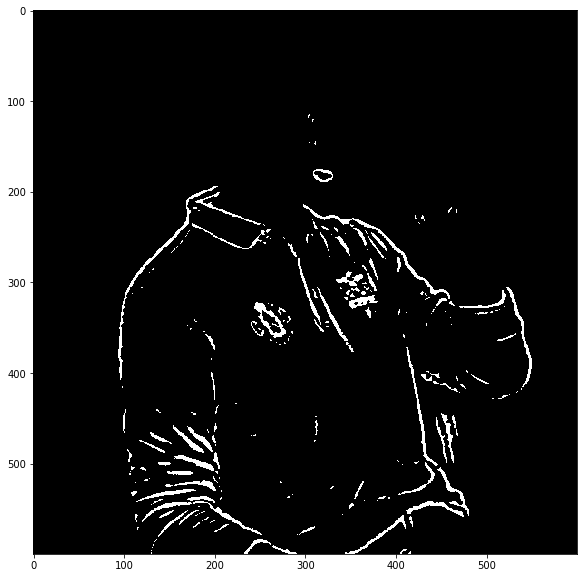

In [0]:
img = cv2.imread(IMG_PATH_RED +"/"+ '72.png')
# BGR to HSV 변환.
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# 특정색만 검출하기
img_mask = cv2.inRange(img_hsv,lower_purple,upper_purple)

# 원본 이미지에서 범위값에 해당하는 영상 부분을 획득한다.
img = cv2.bitwise_and(img,img,mask=img_mask)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# BGR 이미지를 GRAY 이미지로 변환.
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)
imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

# GRAY 이미지를 가우시안 필터를 활용하여 외곽선 추출.
img_blurred = cv2.GaussianBlur(gray,ksize=(5,5),sigmaX=0)
img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
)

plt.figure(figsize=(12,10))
plt.imshow(img_thresh,cmap='gray')

# train data 생성
1. 파일 가져오기 
2. RGB 데이터, HSV 데이터로 변환 
3. 특정한 색 부분을 제외한 후, 경계선을 추출하기.
4. 원본 이미지와 Mask 영역 저장하기.



In [0]:
# Get train and test IDs (image 폴더가 들어간 디렉토리 이름 리스트 저장)
# [0] : directory path (PWD) [1] : all sub-directories [2] : all sub-files
# [0] : 특정 디렉토리의 위치값을 저장 [1] : 특정 디렉토리의 하위 디렉토리 리스트를 저장 [2]: 특정 디렉토리에 포함된 모든 파일 리스트를 저장
img_ids = next(os.walk(IMG_PATH_BLUE))[2]
print('train data 만들기 : 각 원본 이미지별 이미지 폴더와 마스크 폴더 만들기!!')
sys.stdout.flush()
for n,id_ in tqdm(enumerate(img_ids),total=len(img_ids)):
    path = IMG_PATH_BLUE
    train_path = TRAIN_PATH
    # 이미지 파일 읽어오기.
    img = cv2.imread(path +"/" + id_ )
    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    
    # 특정색만 검출하기
    img_mask = cv2.inRange(img_hsv,lower_blue,upper_blue)
 
    # 원본 이미지에서 범위값에 해당하는 영상 부분을 획득한다.
    img_result = cv2.bitwise_and(img,img,mask=img_mask)
 
    # BGR 이미지를 GRAY 이미지로 변환.
    gray = cv2.cvtColor(img_result,cv2.COLOR_BGR2GRAY)    
    structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
    imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)
    imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
    gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

    # GRAY 이미지를 가우시안 필터를 활용하여 외곽선 추출.
    img_blurred = cv2.GaussianBlur(gray,ksize=(5,5),sigmaX=0)
    img_thresh = cv2.adaptiveThreshold(
    img_blurred, 
    maxValue=255.0, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY_INV, 
    blockSize=19, 
    C=9
    )
    # 파일 디렉토리 만들기 
    os.mkdir(train_path + "/" + id_ + "/")
    os.mkdir(train_path + "/" + id_ + "/" + "image" +"/")
    os.mkdir(train_path + "/" + id_ + "/" + "mask"  +"/")
    cv2.imwrite(train_path + "/"  + id_ +"/" + "image" +"/"+id_,img)
    cv2.imwrite(train_path + "/"  + id_ +"/" + "mask" +"/"+id_,img_thresh)

# modeling : U-Net 구조를 활용하여 data training 하기.

In [0]:
# skimage 라이브러리 image를 처리할 때, 사용하는 라이브러리
from itertools import chain # chain 은 서로 다른 리스트를 묶어 준후, 순서대로 출력하는 기능을 제공해줍니다.
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.color import rgb2gray
from skimage import io
from skimage.transform import resize
from skimage.morphology import label

# keras로 Machine Learnin 관련된 언어로, ML 모델을 만들 때, 필요한 라이브러리를 제공합니다.  
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout,Lambda # Dropout은 overfitting을 막기위하여 사용되고 있다.
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D # MaxPooling2D는 이미지 사이즈를 축소하는데 사용되고 있다.
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.layers import BatchNormalization

import tensorflow as tf
# Set some parameters
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
# colab을 사용하고 있어서 아래와 같은 경로를 사용하였습니다.../content/gdrive/My Drive/까지는 기본적으로 클라우드 실행시 경로입니다. 
TRAIN_PATH = '../content/gdrive/My Drive/data/clothes_recognition/train_data_npng/'
TEST_PATH  = '../content/gdrive/My Drive/data/clothes_recognition/test_data_npng/'

warnings.filterwarnings('ignore',category=UserWarning,module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

In [0]:
# Get train and test IDs (image 폴더가 들어간 디렉토리 이름 리스트 저장)
# [0] : directory path (PWD) [1] : all sub-directories [2] : all sub-files
# [0] : 특정 디렉토리의 위치값을 저장 [1] : 특정 디렉토리의 하위 디렉토리 리스트를 저장 [2]: 특정 디렉토리에 포함된 모든 파일 리스트를 저장
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [0]:
# Get and resize train images and masks 
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path + '/image/' + id_)[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img

    mask  = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    mask_ = imread(path + '/mask/' + id_)
    mask_ = rgb2gray(mask_)
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                  preserve_range=True), axis=-1)
    mask = np.maximum(mask, mask_)  # 모든 마스크를 다 더하기.
    Y_train[n] = mask
print('Done!')

In [0]:
# Get and resize test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/image/' + id_)[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

    mask  = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    mask_ = imread(path + '/mask/' + id_)
    mask_ = rgb2gray(mask_)
    mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                  preserve_range=True), axis=-1)
    mask = np.maximum(mask, mask_)  # 모든 마스크를 다 더하기.
    Y_test[n] = mask

print('Done!')

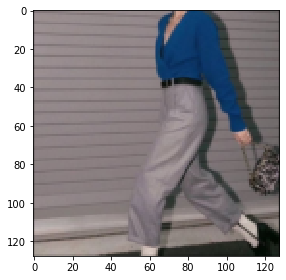

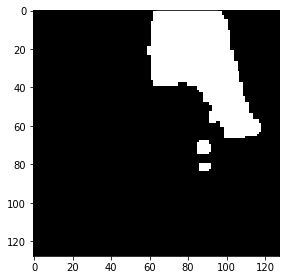

In [89]:
# Check if training data looks all right
ix = random.randint(0,len(train_ids)-1)
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()

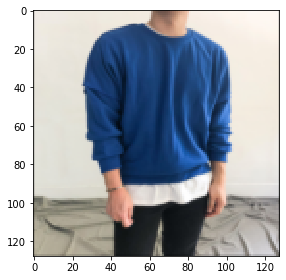

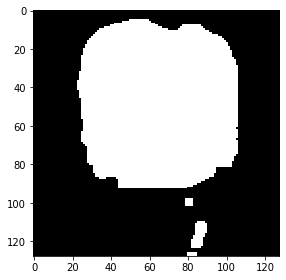

In [90]:
# Check if training data looks all right
ix = random.randint(0,len(test_ids)-1)
imshow(X_test[ix])
plt.show()
imshow(np.squeeze(Y_test[ix]))
plt.show()

In [0]:
# Define IoU metric
# IoU 매트릭은 target과 prediction 사이의 공통 픽셀 수를 총 픽셀 수로 나눈 값을 측정합니다.
# Mean IU :(전체 픽셀과 예측 실패 픽셀-예측성공 픽셀의 합에서 예측 성공 픽셀 합=IOU)의 평균
# 아래 식은 픽셀의 예측이 0.5 ~ 1.0 사이의 값들을 IOU의 평균값을 구하는 식입니다.
# Define IoU metric
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [0]:
def iou_at_thresholds(target_mask, pred_mask, thresholds=np.arange(0.5,1,0.05)):
    '''Returns True if IoU is greater than the thresholds.'''
    intersection = np.logical_and(target_mask, pred_mask)
    union = np.logical_or(target_mask, pred_mask)
    iou = np.sum(intersection > 0) / np.sum(union > 0)
    return iou > thresholds

def calculate_average_precision(target_masks, pred_masks, thresholds=np.arange(0.5,1,0.05)):
    '''Calculates the average precision over a range of thresholds for one observation (with a single class).'''
    iou_tensor = np.zeros([len(thresholds), len(pred_masks), len(target_masks)])

    for i, p_mask in enumerate(pred_masks):
        for j, t_mask in enumerate(target_masks):
            iou_tensor[:, i, j] = iou_at_thresholds(t_mask, p_mask, thresholds)

    TP = np.sum((np.sum(iou_tensor, axis=2) == 1), axis=1)
    FP = np.sum((np.sum(iou_tensor, axis=1) == 0), axis=1)
    FN = np.sum((np.sum(iou_tensor, axis=2) == 0), axis=1)

    precision = TP / (TP + FP + FN)

    return np.mean(precision)

In [0]:
# Build U-Net Model(c1~c5까지는 이미지의 크기가 점점 작아지고, u6~c9까지는 이미지의 크기를 키워준다.이때 이전의 weight값을 서로 연결시켜줘서 보정을 해준다.))
# 모델링이 되어지면 이미지마다 그 점마다 맞았다는 확률로 변환이 가능하다. 많은 트레이닝 케이스로 모델링을 할 수있다.
# U-Net의 특징은 적은 케이스로 모델링을 할 수 있는 장점이 있다.
# Build U-Net model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])
model.summary()

In [94]:
# Build U-Net Model(c1~c5까지는 이미지의 크기가 점점 작아지고, u6~c9까지는 이미지의 크기를 키워준다.이때 이전의 weight값을 서로 연결시켜줘서 보정을 해준다.))
# 모델링이 되어지면 이미지마다 그 점마다 맞았다는 확률로 변환이 가능하다. 많은 트레이닝 케이스로 모델링을 할 수있다.
# U-Net의 특징은 적은 케이스로 모델링을 할 수 있는 장점이 있다.
# Build U-Net model
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=[mean_iou])
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_9 (Lambda)               (None, 128, 128, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_153 (Conv2D)             (None, 128, 128, 16) 448         lambda_9[0][0]                   
__________________________________________________________________________________________________
dropout_68 (Dropout)            (None, 128, 128, 16) 0           conv2d_153[0][0]                 
____________________________________________________________________________________________

In [95]:
# Fit model1
earlystopper = EarlyStopping(patience=5,verbose=1)
checkpointer = ModelCheckpoint('/content/gdrive/My Drive/data/clothes_recognition/model-2020-2-21.h5',verbose=1,save_best_only=True)
results = model.fit(X_train,Y_train,validation_split=0.1,batch_size=16,epochs=50,callbacks=[earlystopper,checkpointer])

Train on 76 samples, validate on 9 samples
Epoch 1/50
76/76 [==============================] - 15s 192ms/step - loss: 0.7211 - mean_iou: 0.2527 - val_loss: 0.6582 - val_mean_iou: 0.3233

Epoch 00001: val_loss improved from inf to 0.65820, saving model to /content/gdrive/My Drive/data/clothes_recognition/model-2020-2-21.h5
Epoch 2/50
76/76 [==============================] - 0s 3ms/step - loss: 0.6243 - mean_iou: 0.3338 - val_loss: 0.7086 - val_mean_iou: 0.3379

Epoch 00002: val_loss did not improve from 0.65820
Epoch 3/50
76/76 [==============================] - 0s 3ms/step - loss: 1.6074 - mean_iou: 0.3465 - val_loss: 0.5892 - val_mean_iou: 0.3516

Epoch 00003: val_loss improved from 0.65820 to 0.58916, saving model to /content/gdrive/My Drive/data/clothes_recognition/model-2020-2-21.h5
Epoch 4/50
76/76 [==============================] - 0s 4ms/step - loss: 0.5968 - mean_iou: 0.3534 - val_loss: 0.6208 - val_mean_iou: 0.3563

Epoch 00004: val_loss did not improve from 0.58916
Epoch 5/50

In [97]:
# Predict on train, val and test
model = load_model('/content/gdrive/My Drive/data/clothes_recognition/model-2020-2-21.h5',custom_objects={'mean_iou':mean_iou})
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)],verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train>0.5).astype(np.uint8)
preds_val_t = (preds_val>0.5).astype(np.uint8)
preds_test_t = (preds_test>0.5).astype(np.uint8)

# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))

10/10 [==============================] - 0s 979us/step


In [98]:
print(calculate_average_precision(Y_test, preds_test_t,thresholds=np.arange(0.5,1,0.05)))

0.5135345047109753


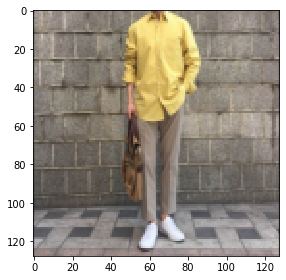

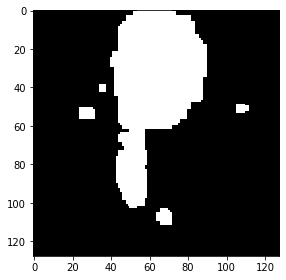

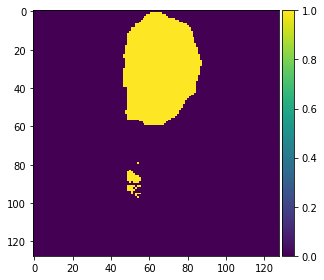

In [99]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

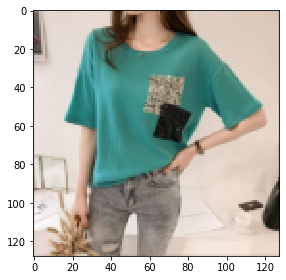

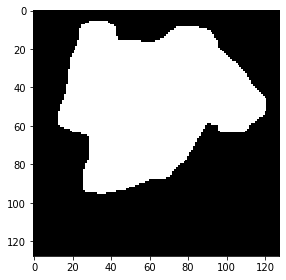

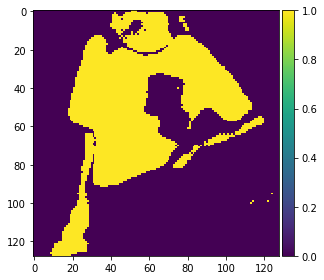

In [100]:
# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t)-1)
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()